In [6]:
import pandas as pd

In [1]:
# chuan bi thong tin ket noi
server ='phpmyadmin.laptrinhphp.net'
db = 'gd_salesdb'
username = 'hv'
pwd = '123456'

In [2]:
connection_string = "mysql+pymysql://{user}:{password}@{host}/{database}?charset=UTF8". \
    format(user=username, password=pwd, host=server, database=db)

In [4]:
from sqlalchemy.engine import create_engine
conn = create_engine(connection_string)

In [8]:
sql = 'select * from orders limit 5'
df = pd.read_sql(sql,conn)
df

,Id,OrderDate,OrderNumber,CustomerId,TotalAmount
0,1,2012-07-04,542378,85,440.0
1,2,2012-07-05,542379,79,1863.4
2,3,2012-07-08,542380,34,1813.0
3,4,2012-07-08,542381,84,670.8
4,5,2012-07-09,542382,76,3730.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           5 non-null      int64         
 1   OrderDate    5 non-null      datetime64[ns]
 2   OrderNumber  5 non-null      object        
 3   CustomerId   5 non-null      int64         
 4   TotalAmount  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 328.0+ bytes


In [12]:
# doc cac don dat hang trong nam 2012
# nhom theo id khach hang va dem so don dat hang
# ve bieu do barplot cho 5 khach hang co nhieu don dat hang nhat
sql = 'select * from orders where Year(orderdate) = 2012'
df = pd.read_sql(sql, conn)
df

,Id,OrderDate,OrderNumber,CustomerId,TotalAmount
0,1,2012-07-04,542378,85,440.0
1,2,2012-07-05,542379,79,1863.4
2,3,2012-07-08,542380,34,1813.0
3,4,2012-07-08,542381,84,670.8
4,5,2012-07-09,542382,76,3730.0
...,...,...,...,...,...
147,148,2012-12-26,542525,35,2333.2
148,149,2012-12-27,542526,25,1903.8
149,150,2012-12-27,542527,60,843.2
150,151,2012-12-30,542528,71,2736.0


<AxesSubplot:xlabel='CustomerId'>

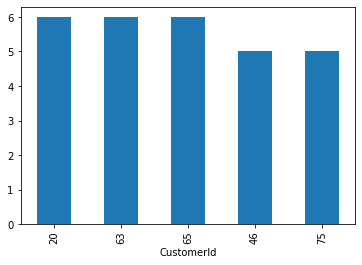

In [20]:
df.groupby('CustomerId').size().sort_values(ascending=False).head(5).plot.bar()

In [25]:
sql = '''
select customerid, count(*) as dem
from orders
where Year(orderdate) = 2012
group by customerid
order by dem desc
limit 5
'''
df = pd.read_sql(sql, conn)
df

,customerid,dem
0,63,6
1,20,6
2,65,6
3,37,5
4,75,5


<AxesSubplot:xlabel='customerid', ylabel='dem'>

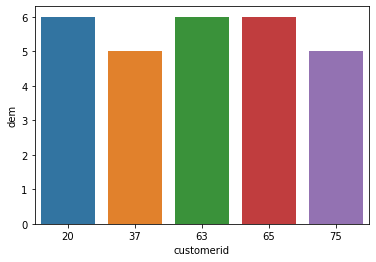

In [33]:
import seaborn as sns
sns.barplot(x="customerid", y="dem", data=df)